In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
# ^^^ pyforest auto-imports - don't write above this line
from pulp import *

In [2]:
# Sampleそのまま
m = LpProblem(sense=LpMaximize) # 数理モデル
x = LpVariable('x', lowBound=0) # 変数
y = LpVariable('y', lowBound=0) # 変数
m += 100 * x + 100 * y # 目的関数
m += x + 2 * y <= 16 # 材料Aの上限の制約条件
m += 3 * x + y <= 18 # 材料Bの上限の制約条件
m.solve() # ソルバーの実行
print(value(x), value(y)) # 4, 6

4.0 6.0


In [4]:
class Vehicle:
    def __init__(self, ):
        self.pos=[] # x, y [m]
        self.size=[] # length, width [m]
        self.ori=[] # [rad]
        self.vel=[] # [m/s]

In [5]:
def vehicle_plot(pos, size, ori):
    if 0:
        points = [
            [pos[0] - size[0]/2, pos[0] + size[0]/2, pos[0] + size[0]/2, pos[0] - size[0]/2, pos[0] - size[0]/2],
            [pos[1] - size[1]/2, pos[1] - size[1]/2, pos[1] + size[1]/2, pos[1] + size[1]/2, pos[1] - size[1]/2]
        ]
    else:
        points = [[],[]]
        x = [- size[0]/2, size[0]/2, size[0]/2, - size[0]/2, - size[0]/2]
        y = [- size[1]/2, - size[1]/2, size[1]/2, size[1]/2, - size[1]/2]
        A = [[np.cos(ori), -np.sin(ori)],[np.sin(ori), np.cos(ori)]]
        for i in range(len(x)):
            buf = np.dot(A,np.array([x[i],y[i]]))
            points[0].append(buf[0] + pos[0])
            points[1].append(buf[1] + pos[1])
    plt.plot(points[0], points[1])

In [12]:
# 駐車車両
parked_vehicle = Vehicle()
parked_vehicle.pos = [20, 1.5]
parked_vehicle.size = [4, 2]
parked_vehicle.ori = 0
parked_vehicle.ori = 0

# 自社
ego_vehicle = Vehicle()
ego_vehicle.pos = [0,0]
ego_vehicle.size = [4,2]
ego_vehicle.ori = 0
ego_vehicle.vel = 10/3.6

 # 車線
width_lane = 4
line_left = [[0,40],[width_lane/2, width_lane/2]]
line_center = [[0,40], [0,0]]
line_right = [[0,40],[-width_lane/2, -width_lane/2]]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Y[m]')

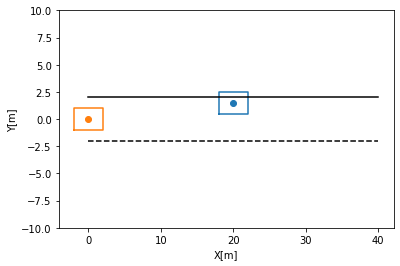

In [13]:
# 描画
plt.scatter(parked_vehicle.pos[0], parked_vehicle.pos[1])
vehicle_plot(parked_vehicle.pos, parked_vehicle.size, parked_vehicle.ori)
plt.scatter(ego_vehicle.pos[0], ego_vehicle.pos[1])
vehicle_plot(ego_vehicle.pos, ego_vehicle.size, ego_vehicle.ori)

plt.plot(line_left[0], line_left[1], 'k')
plt.plot(line_right[0], line_right[1], '--k')

plt.ylim([-10,10])
plt.xlabel('X[m]')
plt.ylabel('Y[m]')

In [85]:
# 経路評価
def evaluation_path(dx,dy):
    
    print(type(dx))
    print(type(dy))
    
    if 1 :
        points = [
            [ego_vehicle.pos[0], parked_vehicle.pos[0] + dx, line_center[0][1]], 
            [ego_vehicle.pos[1], parked_vehicle.pos[1] + dy, line_center[1][1]]
        ]
    else :
        points = [
            [ego_vehicle.pos[0], parked_vehicle.pos[0], line_center[0][1]], 
            [ego_vehicle.pos[1], parked_vehicle.pos[1], line_center[1][1]]
        ]

    print(type(points))
    print(points)
    print(points[0][1])
    print(type(points[0][1]))
    print(points[1][1])
    print(type(points[1][1]))
    
    path_coef = np.polyfit(points[0], points[1], 6)
    
    path_x= np.linspace(ego_vehicle.pos[0], line_left[0][1], 20)
    path_y = np.poly1d(path_coef)(path_x)
    
    eval_val = 0 
    
    # (１)死角
    eval_val += 1 * calculation_dead_area(path_x, path_y)
    
    # (２)はみ出し
    eval_val += 1 * calculation_out_of_road(path_x, path_y)
    
    # (３)衝突
    eval_val += calculation_collision(path_x, path_y)
    
    # (４)道路中央を走行
    
    # (５)ジャーク（yの二回微分）
    
    # (６)ハンドル角速度（曲率変化量） 
    
    return eval_val

In [86]:
# 死角の計算
def calculation_dead_area(path_x, path_y):
    fr = [parked_vehicle.pos[0] + parked_vehicle.size[0]/2, parked_vehicle.pos[1] - parked_vehicle.size[1]]
    fl = [parked_vehicle.pos[0] + parked_vehicle.size[0]/2, parked_vehicle.pos[1] + parked_vehicle.size[1]]
    
    dead_area = 0
    
    for i in range(len(path_x)):
        a = ( (fr[0] - path_x[i]) / (fr[1] - path_y[i]) ) * parked_vehicle.size[1]
        b = parked_vehicle.size[1] 
        dead_area += a * b * 1/2
    
    return dead_area

In [87]:
# はみ出し
def calculation_out_of_road(path_x, path_y):
    return np.sum(path_y<line_right[1][0])

In [88]:
# 衝突
def calculation_collision(path_x, path_y):
    d = np.sqrt((parked_vehicle.pos[0] - path_x) ** 2 + (parked_vehicle.pos[1] - path_y) ** 2)
    d_min = np.min(d)
    
    torelance = 3
    ret = 0
    
    if d_min < torelance:
        ret = np.inf
        
    return ret

In [89]:
m = LpProblem(sense=LpMaximize) # 数理モデル
x = LpVariable('x', lowBound=-10, upBound = 0, cat = 'Continuous') # 変数
y = LpVariable('y', lowBound=-3, upBound = 0, cat = 'Continuous') # 変数
m +=  evaluation_path(x,y)# 目的関数

<class 'pulp.pulp.LpVariable'>
<class 'pulp.pulp.LpVariable'>
<class 'list'>
[[0, 1*x + 20, 40], [0, 1*y + 1.5, 0]]
x + 20
<class 'pulp.pulp.LpAffineExpression'>
y + 1.5
<class 'pulp.pulp.LpAffineExpression'>


<IPython.core.display.Javascript object>

ValueError: data type <class 'numpy.object_'> not inexact

In [34]:
x1 =np.array([1,2,3,4])
y1 =np.array([1,2,3,4])
x2 =np.array([2,3,4,5])
y2 =np.array([2,3,4,5])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

<IPython.core.display.Javascript object>

array([1.41421356, 1.41421356, 1.41421356, 1.41421356])

In [58]:
type(x1)

numpy.ndarray

In [72]:
dir(x)

['_LpElement__name',
 '__add__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pos__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 'addVariableToConstraints',
 'add_expression',
 'asCplexLpAffineExpression',
 'asCplexLpVariable',
 'bounds',
 'cat',
 'dict',
 'dicts',
 'dj',
 'fixValue',
 'getLb',
 'getName',
 'getUb',
 'hash',
 'infeasibilityGap',
 'init',
 'isBinary',
 'isConstant',
 'isFree',
 'isInteger',
 'isPositive',
 'lowBound',
 'matrix',
 'modified',
 'name',
 'positive',
 'round',
 'roundedValue',
 'setInitialValue',
 'setName',
 'trans',
 'upBound',
 'valid',
 'value',
 'valueOrDefaul

In [74]:
dir(x.value)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__func__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']